Extracting EDF parameters from f:\WEBSITE\EDF_analysis\EDF+\Zacker\Zacker.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 139775  =      0.000 ...  1091.992 secs...


<>:28: SyntaxWarning: invalid escape sequence '\Z'
<>:28: SyntaxWarning: invalid escape sequence '\Z'
C:\Users\Admin\AppData\Local\Temp\ipykernel_6600\3357649682.py:28: SyntaxWarning: invalid escape sequence '\Z'
  raw = mne.io.read_raw_edf('EDF+\Zacker\Zacker.edf', preload=True, infer_types=True, verbose=True)


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 423 samples (3.305 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.4s


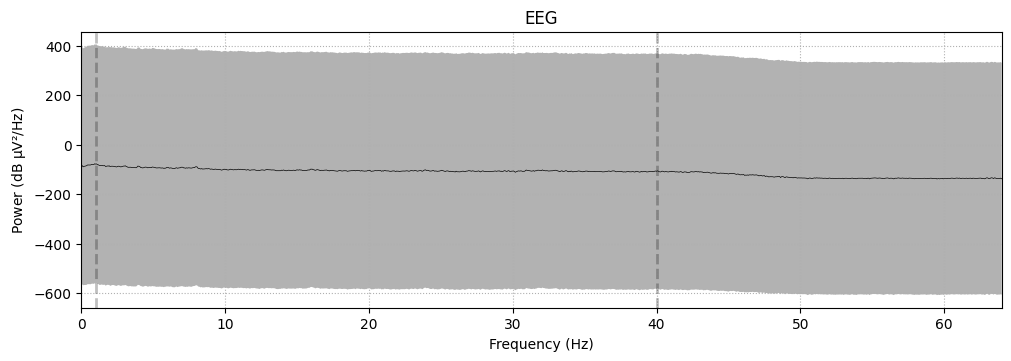

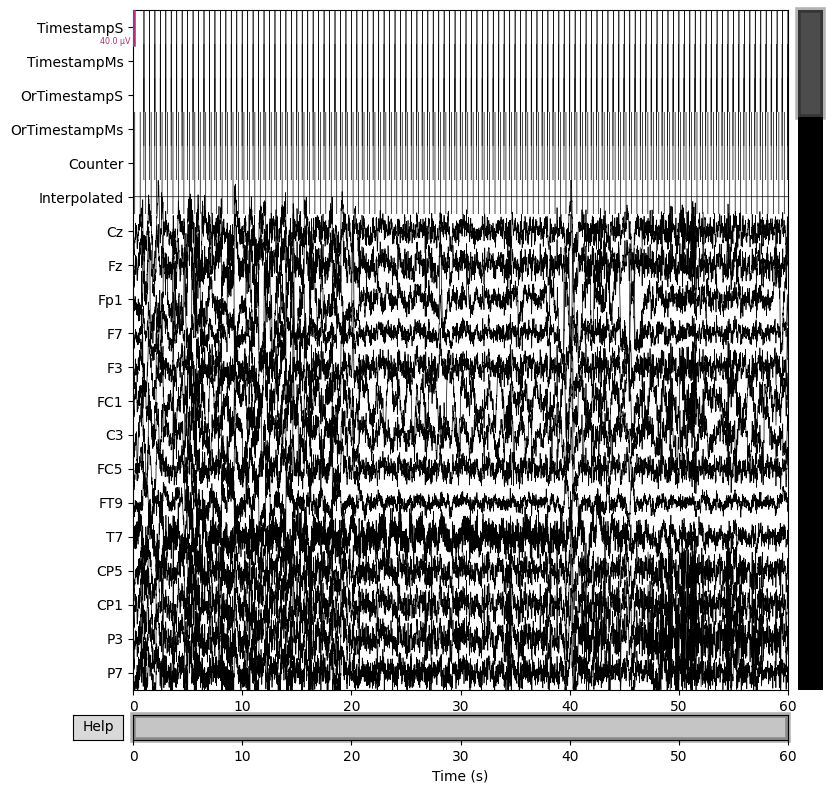

Effective window size : 16.000 (s)
Plotting power spectral density (dB=True).


C:\Users\Admin\AppData\Local\Temp\ipykernel_6600\3357649682.py:146: UserWarning: Zero value in spectrum for channels Interpolated, SaturationFlag, MarkerHardware
  fig = raw.compute_psd(tmax=np.inf, fmax=64).plot(
C:\Users\Admin\AppData\Local\Temp\ipykernel_6600\3357649682.py:146: UserWarning: Infinite value in PSD for channels Interpolated, SaturationFlag, MarkerHardware.
These channels might be dead.
  fig = raw.compute_psd(tmax=np.inf, fmax=64).plot(
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\mne\viz\utils.py:167: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


In [15]:
"""
.. _tut-artifact-overview:

==============================
Overview of artifact detection
==============================

This tutorial covers the basics of artifact detection, and introduces the
artifact detection tools available in MNE-Python.

We begin as always by importing the necessary Python modules and loading some
:ref:`example data <sample-dataset>`:
"""
eeg_channels = ['Cz', 'Fz', 'Fp1', 'F7', 'F3', 'FC1', 'C3', 'FC5', 'FT9', 'T7', 'CP5', 'CP1', 'P3', 'P7', 'PO9', 'O1', 'Pz', 'Oz', 'O2', 'PO10', 'P8', 'P4', 'CP2', 'CP6', 'T8', 'FT10', 'FC6', 'C4', 'FC2', 'F4', 'F8', 'Fp2']

# License: BSD-3-Clause
# Copyright the MNE-Python contributors.
# %%

import os

import numpy as np

import mne



raw = mne.io.read_raw_edf('EDF+\Zacker\Zacker.edf', preload=True, infer_types=True, verbose=True)
raw.pick_types(eeg=True)
montage = mne.channels.make_standard_montage('standard_1020')
raw.set_montage(montage, on_missing='ignore')
raw.set_eeg_reference('average', projection=True)
raw.filter(l_freq=1, h_freq=40)
raw.crop(0, 60).load_data()  # just use a fraction of data for speed here
# %%
# What are artifacts?
# ^^^^^^^^^^^^^^^^^^^
#
# Artifacts are parts of the recorded signal that arise from sources other than
# the source of interest (i.e., neuronal activity in the brain). As such,
# artifacts are a form of interference or noise relative to the signal of
# interest. There are many possible causes of such interference, for example:
#
# - Environmental artifacts
#     - Persistent oscillations centered around the `AC power line frequency`_
#       (typically 50 or 60 Hz)
#     - Brief signal jumps due to building vibration (such as a door slamming)
#     - Electromagnetic field noise from nearby elevators, cell phones, the
#       geomagnetic field, etc.
#
# - Instrumentation artifacts
#     - Electromagnetic interference from stimulus presentation (such as EEG
#       sensors picking up the field generated by unshielded headphones)
#     - Continuous oscillations at specific frequencies used by head position
#       indicator (HPI) coils
#     - Random high-amplitude fluctuations (or alternatively, constant zero
#       signal) in a single channel due to sensor malfunction (e.g., in surface
#       electrodes, poor scalp contact)
#
# - Biological artifacts
#     - Periodic `QRS`_-like signal patterns (especially in magnetometer
#       channels) due to electrical activity of the heart
#     - Short step-like deflections (especially in frontal EEG channels) due to
#       eye movements
#     - Large transient deflections (especially in frontal EEG channels) due to
#       blinking
#     - Brief bursts of high frequency fluctuations across several channels due
#       to the muscular activity during swallowing
#
# There are also some cases where signals from within the brain can be
# considered artifactual. For example, if a researcher is primarily interested
# in the sensory response to a stimulus, but the experimental paradigm involves
# a behavioral response (such as button press), the neural activity associated
# with the planning and executing the button press could be considered an
# artifact relative to signal of interest (i.e., the evoked sensory response).
#
# .. note::
#     Artifacts of the same genesis may appear different in recordings made by
#     different EEG or MEG systems, due to differences in sensor design (e.g.,
#     passive vs. active EEG electrodes; axial vs. planar gradiometers, etc).
#
#
# What to do about artifacts
# ^^^^^^^^^^^^^^^^^^^^^^^^^^
#
# There are 3 basic options when faced with artifacts in your recordings:
#
# 1. *Ignore* the artifact and carry on with analysis
# 2. *Exclude* the corrupted portion of the data and analyze the remaining data
# 3. *Repair* the artifact by suppressing artifactual part of the recording
#    while (hopefully) leaving the signal of interest intact
#
# There are many different approaches to repairing artifacts, and MNE-Python
# includes a variety of tools for artifact repair, including digital filtering,
# independent components analysis (ICA), Maxwell filtering / signal-space
# separation (SSS), and signal-space projection (SSP). Separate tutorials
# demonstrate each of these techniques for artifact repair. Many of the
# artifact repair techniques work on both continuous (raw) data and on data
# that has already been epoched (though not necessarily equally well); some can
# be applied to `memory-mapped`_ data while others require the data to be
# copied into RAM. Of course, before you can choose any of these strategies you
# must first *detect* the artifacts, which is the topic of the next section.
#
#
# Artifact detection
# ^^^^^^^^^^^^^^^^^^
#
# MNE-Python includes a few tools for automated detection of certain artifacts
# (such as heartbeats and blinks), but of course you can always visually
# inspect your data to identify and annotate artifacts as well.
#
# We saw in :ref:`the introductory tutorial <tut-overview>` that the example
# data includes :term:`SSP projectors <projector>`, so before we look at
# artifacts let's set aside the projectors in a separate variable and then
# remove them from the :class:`~mne.io.Raw` object using the
# :meth:`~mne.io.Raw.del_proj` method, so that we can inspect our data in it's
# original, raw state:

ssp_projectors = raw.info["projs"]
raw.del_proj()

# %%
# Low-frequency drifts
# ~~~~~~~~~~~~~~~~~~~~
#
# Low-frequency drifts are most readily detected by visual inspection using the
# basic :meth:`~mne.io.Raw.plot` method, though it is helpful to plot a
# relatively long time span and to disable channel-wise DC shift correction.
# Here we plot 60 seconds and show all the magnetometer channels:

# mag_channels = mne.pick_types(raw.info, meg="mag")
raw.plot(duration=60, remove_dc=False)

# %%
# Low-frequency drifts are readily removed by high-pass filtering at a fairly
# low cutoff frequency (the wavelength of the drifts seen above is probably
# around 20 seconds, so in this case a cutoff of 0.1 Hz would probably suppress
# most of the drift).
#
# Power line noise
# ~~~~~~~~~~~~~~~~
#
# Power line artifacts are easiest to see on plots of the spectrum, so we'll
# use :meth:`~mne.io.Raw.compute_psd` to illustrate.

fig = raw.compute_psd(tmax=np.inf, fmax=64).plot(
    average=True, amplitude=False, picks="data", exclude="bads"
)
# add some arrows at 60 Hz and its harmonics:
for ax in fig.axes[1:]:
    freqs = ax.lines[-1].get_xdata()
    psds = ax.lines[-1].get_ydata()
    for freq in (60, 120, 180, 240):
        idx = np.searchsorted(freqs, freq)
        ax.arrow(
            x=freqs[idx],
            y=psds[idx] + 18,
            dx=0,
            dy=-12,
            color="red",
            width=0.1,
            head_width=3,
            length_includes_head=True,
        )
# ecg_evoked = create_ecg_epochs(raw).average()
# ecg_evoked.plot_joint()

In [45]:
import os
import numpy as np
import mne
from mne.preprocessing import EOGRegression
import matplotlib.pyplot as plt

# Load your EDF file
raw = mne.io.read_raw_edf('EDF+\\Zacker\\Zacker.edf', preload=True, infer_types=True, verbose=True)

# Pick only the specified EEG channels
eeg_channels = ['Cz', 'Fz', 'Fp1', 'F7', 'F3', 'FC1', 'C3', 'FC5', 'FT9', 'T7', 'CP5', 'CP1', 'P3', 'P7', 'PO9', 'O1', 'Pz', 'Oz', 'O2', 'PO10', 'P8', 'P4', 'CP2', 'CP6', 'T8', 'FT10', 'FC6', 'C4', 'FC2', 'F4', 'F8', 'Fp2']
raw.pick_channels(eeg_channels)

# Set montage
montage = mne.channels.make_standard_montage('standard_1020')
raw.set_montage(montage, on_missing='ignore')

# Set EEG reference
raw.set_eeg_reference('average', projection=True)

# Apply band-pass filter
raw.filter(l_freq=1, h_freq=40)

# Crop data to use a fraction for speed
raw.crop(0, 60).load_data()

# Create artificial events (every 10 seconds for demonstration)
event_id = {"visual/left": 1, "visual/right": 2}
events = np.array([[10 * i * raw.info['sfreq'], 0, 1 + (i % 2)] for i in range(1, int(raw.times[-1] // 10))], dtype=int)

# Create epochs based on artificial events
epochs = mne.Epochs(raw, events, event_id=event_id, tmin=-0.2, tmax=0.5, preload=True)

# Perform EOG regression using Fp1 and Fp2 as surrogate EOG channels
eog_reg = EOGRegression()
eog_reg.fit(raw, eog_ch_names=['Fp1', 'Fp2'])

# Clean the data using the fitted regression model
cleaned_epochs = eog_reg.apply(epochs)

# Plot the raw and cleaned data for comparison
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))

# Plot raw data in the first subplot
raw.plot(show_options=True, title='Raw EEG Data', show=False)
plt.gcf().canvas.draw()
axes[0].imshow(plt.gcf().canvas.buffer_rgba())

# Plot cleaned data in the second subplot
cleaned_epochs.plot(show_options=True, title='Cleaned EEG Data', show=False)
plt.gcf().canvas.draw()
axes[1].imshow(plt.gcf().canvas.buffer_rgba())

# Show the figure
plt.tight_layout()
plt.show()


Extracting EDF parameters from f:\WEBSITE\EDF_analysis\EDF+\Zacker\Zacker.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 139775  =      0.000 ...  1091.992 secs...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwid

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


TypeError: EOGRegression.fit() got an unexpected keyword argument 'eog_ch_names'

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


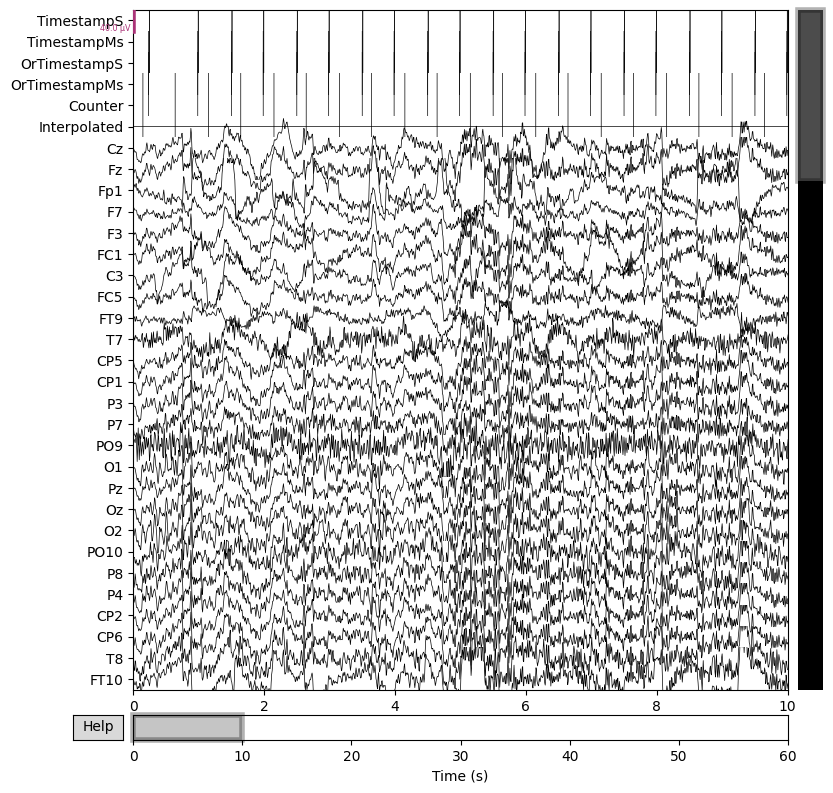

ValueError: Unable to generate artificial ECG channel

In [43]:
from mne.preprocessing import create_ecg_epochs
raw.plot( n_channels=len(eeg_channels))
ecg_evoked = create_ecg_epochs(raw).average()

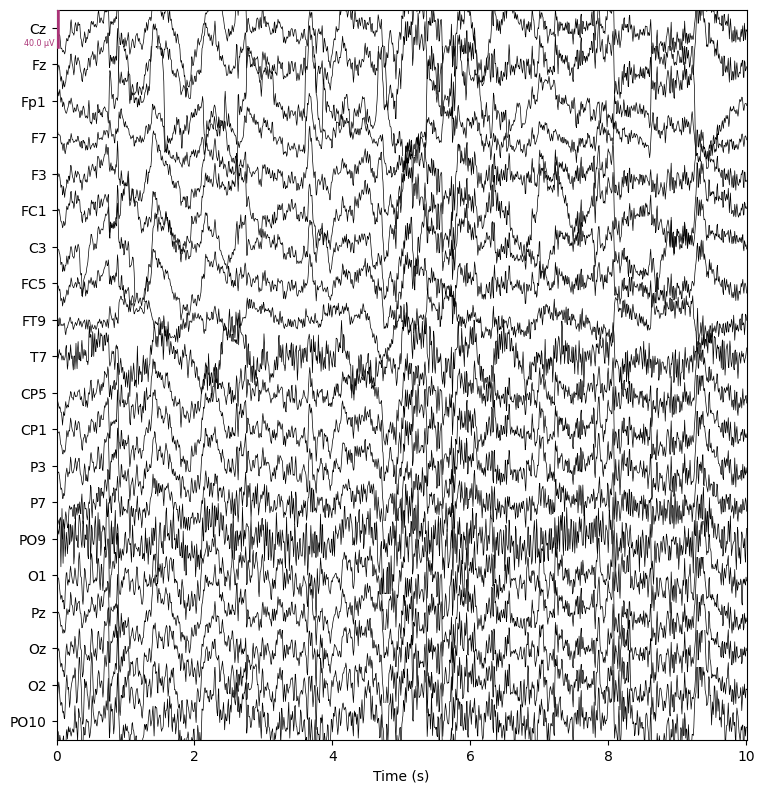

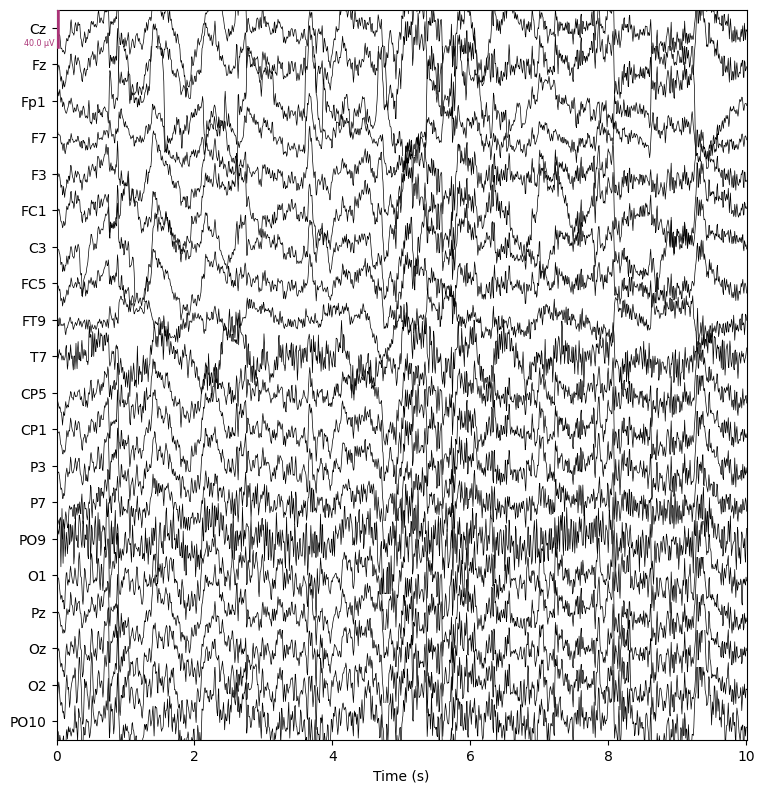

In [22]:
# pick some channels that clearly show heartbeats and blinks
regexp = r"(EEG)"
# artifact_picks = mne.pick_channels_regexp(raw.ch_names, regexp=regexp)
# print(artifact_picks)
raw.plot(picks =eeg_channels ,show_scrollbars=False)

In [23]:
raw.filter(
    l_freq = 1,
    h_freq = 40,
    picks = eeg_channels,
    filter_length = "auto",
    l_trans_bandwidth = "auto",
    h_trans_bandwidth = "auto",
    n_jobs= 4,
    method = "fir",
    iir_params = None,
    phase = "zero",
    fir_window = "hamming",
    fir_design = "firwin",
    skip_by_annotation = ("edge", "bad_acq_skip"),
    pad = "reflect_limited",
    verbose = True
)

Filtering a subset of channels. The highpass and lowpass values in the measurement info will not be updated.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 423 samples (3.305 s)



[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  14 tasks      | elapsed:    1.5s
[Parallel(n_jobs=4)]: Done  32 out of  32 | elapsed:    1.5s finished


Measurement date,"April 09, 2024 14:04:26 GMT"
Experimenter,Unknown
Participant,X
Digitized points,35 points
Good channels,127 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,128.00 Hz
Highpass,1.00 Hz
Lowpass,40.00 Hz


In [31]:
raw.pick('eeg')

Measurement date,"April 09, 2024 14:04:26 GMT"
Experimenter,Unknown
Participant,X
Digitized points,35 points
Good channels,127 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,128.00 Hz
Highpass,1.00 Hz
Lowpass,40.00 Hz


In [39]:
raw.plot_projs_topomap()
# raw.plot()

ValueError: No projectors in Info; nothing to plot.

In [26]:
dir(raw)

['__class__',
 '__contains__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_annotations',
 '_cals',
 '_check_bad_segment',
 '_comp',
 '_cropped_samp',
 '_data',
 '_dtype',
 '_dtype_',
 '_extra_attributes',
 '_filenames',
 '_first_samps',
 '_first_time',
 '_get_buffer_size',
 '_get_channel_positions',
 '_getitem',
 '_handle_tmin_tmax',
 '_init_kwargs',
 '_last_samps',
 '_last_time',
 '_orig_units',
 '_parse_get_set_params',
 '_pick_drop_channels',
 '_pick_projs',
 '_preload_data',
 '_projector',
 '_projectors',
 '_raw_extras',
 '_raw_lengths',
 '_read_comp_grade',
 '_read_picks',


In [8]:
raw.preprocessing.EOGRegression(picks=None, exclude='bads', picks_artifact='eog', proj=True)[source]


AttributeError: 'RawEDF' object has no attribute 'preprocessing'

In [13]:
# ecg_epochs = mne.preprocessing.create_ecg_epochs(raw,picks=eeg_channels)
# ecg_epochs.plot_image(combine="mean")

# # %%
# # The horizontal streaks in the magnetometer image plot reflect the fact that
# # the heartbeat artifacts are superimposed on low-frequency drifts like the one
# # we saw in an earlier section; to avoid this you could pass
# # ``baseline=(-0.5, -0.2)`` in the call to
# # :func:`~mne.preprocessing.create_ecg_epochs`.
# # You can also get a quick look at the
# # ECG-related field pattern across sensors by averaging the ECG epochs together
# # via the :meth:`~mne.Epochs.average` method, and then using the
# # :meth:`mne.Evoked.plot_topomap` method:

# avg_ecg_epochs = ecg_epochs.average().apply_baseline((-0.5, -0.2))

# # %%
# # Here again we can visualize the spatial pattern of the associated field at
# # various times relative to the peak of the EOG response:

# avg_ecg_epochs.plot_topomap(times=np.linspace(-0.05, 0.05, 11))

# # %%
# # Or, we can get an ERP/F plot with :meth:`~mne.Evoked.plot` or a combined
# # scalp field maps and ERP/F plot with :meth:`~mne.Evoked.plot_joint`. Here
# # we've specified the times for scalp field maps manually, but if not provided
# # they will be chosen automatically based on peaks in the signal:

# avg_ecg_epochs.plot_joint(times=[-0.25, -0.025, 0, 0.025, 0.25])

# %%
# Ocular artifacts (EOG)
# ~~~~~~~~~~~~~~~~~~~~~~
#
# Similar to the ECG detection and epoching methods described above, MNE-Python
# also includes functions for detecting and extracting ocular artifacts:
# :func:`~mne.preprocessing.find_eog_events` and
# :func:`~mne.preprocessing.create_eog_epochs`. Once again we'll use the
# higher-level convenience function that automatically finds the artifacts and
# extracts them in to an :class:`~mne.Epochs` object in one step. Unlike the
# heartbeat artifacts seen above, ocular artifacts are usually most prominent
# in the EEG channels, but we'll still show all three channel types. We'll use
# the ``baseline`` parameter this time too; note that there are many fewer
# blinks than heartbeats, which makes the image plots appear somewhat blocky:

eog_epochs = mne.preprocessing.create_eog_epochs(raw, 'fp2',baseline=(-0.5, -0.2))
eog_epochs.plot_image(combine="mean")
eog_epochs.average().plot_joint()

# %%
# Summary
# ^^^^^^^
#
# Familiarizing yourself with typical artifact patterns and magnitudes is a
# crucial first step in assessing the efficacy of later attempts to repair
# those artifacts. A good rule of thumb is that the artifact amplitudes should
# be orders of magnitude larger than your signal of interest — and there should
# be several occurrences of such events — in order to find signal
# decompositions that effectively estimate and repair the artifacts.
#
# Several other tutorials in this section illustrate the various tools for
# artifact repair, and discuss the pros and cons of each technique, for
# example:
#
# - :ref:`tut-artifact-ssp`
# - :ref:`tut-artifact-ica`
# - :ref:`tut-artifact-sss`
#
# There are also tutorials on general-purpose preprocessing steps such as
# :ref:`filtering and resampling <tut-filter-resample>` and :ref:`excluding
# bad channels <tut-bad-channels>` or :ref:`spans of data
# <tut-reject-data-spans>`.
#
# .. LINKS
#
# .. _`AC power line frequency`:
#    https://en.wikipedia.org/wiki/Mains_electricity
# .. _`QRS`: https://en.wikipedia.org/wiki/QRS_complex
# .. _`memory-mapped`: https://en.wikipedia.org/wiki/Memory-mapped_file

ValueError: The specified EOG channel cannot be found: fp2